In [1]:
import numpy
import sympy
from matplotlib import pyplot
sympy.init_printing()

In [2]:
(u_max, u_star, rho_max, rho_star, A, B) = sympy.symbols('u_max u_star rho_max rho_star A B')

In [3]:
eq1 = sympy.Eq(0, u_max*rho_max*(1 - A*rho_max - B*rho_max**2))
eq2 = sympy.Eq(0, u_max*(1 - 2*A*rho_star - 3*B*rho_star**2))
eq3 = sympy.Eq(u_star, u_max*(1 - A*rho_star - B*rho_star**2))

In [4]:
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)

In [5]:
eq4

In [6]:
eq4.simplify()

In [7]:
rho_sol = sympy.solve(eq4, rho_star)[0]

In [8]:
rho_sol

In [9]:
B_sol = sympy.solve(eq1, B)[0]
#Don't forget to add [0] even if only one soln

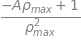

In [10]:
B_sol

In [11]:
quadA = eq2.subs([(rho_star, rho_sol), (B, B_sol)])

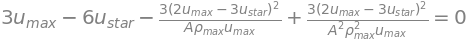

In [12]:
quadA.simplify()

In [13]:
A_sol = sympy.solve(quadA, A)

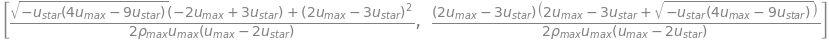

In [14]:
A_sol

In [15]:
A_val_0 = A_sol[0].evalf(subs = {u_star: 1.5, u_max: 2.0, rho_max: 15})
A_val_0

In [16]:
A_val_1 = A_sol[1].evalf(subs = {u_star: 1.5, u_max: 2.0, rho_max: 15.0})
A_val_1

In [17]:
A_val = max(A_val_0, A_val_1)
A_val

In [18]:
B_val = B_sol.evalf(subs = {A: A_val, rho_max: 15.0})
B_val

In [19]:
F, rho_th_max = sympy.symbols('F rho_max^th')

In [20]:
flux = u_max*(rho_th_max - A*rho_th_max**2 - B*rho_th_max**3)

In [21]:
flux_prime = sympy.diff(flux, rho_th_max)
flux_prime

In [22]:
u_max_val = 2.0
wave_speed = flux_prime.subs([(A, A_val), (B, B_val), (u_max, u_max_val)])
wave_speed

In [23]:
eq5 = sympy.Eq(0, wave_speed)
eq5

rho_th_max_val = sympy.solve(eq5, rho_th_max)
print(rho_th_max_val)

[-12.6460549622588, 8.43070330817253]


The positive root is the answer of the max th. density. 